In [ ]:
# Let's now implement the absolute price oscillator, with the faster EMA using a period of 10
# days and a slower EMA using a period of 40 days, and default smoothing factors being 2/11
# and 2/41, respectively, for the two EMAs:

In [1]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
num_periods_fast = 10 # time period for the fast EMA
K_fast = 2 / (num_periods_fast + 1) # smoothing factor for fast EMA
ema_fast = 0
num_periods_slow = 40 # time period for slow EMA
K_slow = 2 / (num_periods_slow + 1) # smoothing factor for slow EMA
ema_slow = 0
ema_fast_values = [] # we will hold fast EMA values for visualization purposes
ema_slow_values = [] # we will hold slow EMA values for visualization purposes
apo_values = [] # track computed absolute price oscillator values


In [3]:
sbi =  yf.Ticker(str('SBIN')+'.NS').history(period="40d")

In [6]:
for close_price in sbi['Close']:
    if (ema_fast == 0): # first observation
        ema_fast = close_price
        ema_slow = close_price
    else:
        ema_fast = (close_price - ema_fast) * K_fast + ema_fast
        ema_slow = (close_price - ema_slow) * K_slow + ema_slow
    ema_fast_values.append(ema_fast)
    ema_slow_values.append(ema_slow)
    apo_values.append(ema_fast - ema_slow)

In [7]:
sbi['FastExponential10DayMovingAverage'] = pd.Series(ema_fast_values, index = sbi.index)
sbi['SlowExponential40DayMovingAverage'] = pd.Series(ema_slow_values, index = sbi.index)
sbi['AbsolutePriceOscillator'] = pd.Series(apo_values, index = sbi.index)

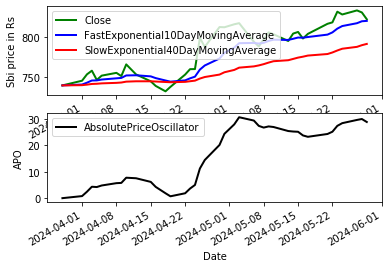

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(211, ylabel='Sbi price in Rs')
sbi['Close'].plot(ax=ax1, color='g', lw=2., legend=True)
sbi['FastExponential10DayMovingAverage'].plot(ax=ax1, color='b', lw=2., legend=True)
sbi['SlowExponential40DayMovingAverage'].plot(ax=ax1, color='r', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='APO')
sbi['AbsolutePriceOscillator'].plot(ax=ax2, color='black', lw=2., legend=True)
plt.show()

One observation here is the difference in behavior between fast and slow EMAs. The faster
one is more reactive to new price observations, and the slower one is less reactive to new
price observations and decays slower. The APO values are positive when prices are
breaking out to the upside, and the magnitude of the APO values captures the magnitude
of the breakout. The APO values are negative when prices are breaking out to the
downside, and the magnitude of the APO values captures the magnitude of the breakout.
In a later chapter in this book, we will use this signal in a realistic trading strategy.